# Решение уравнения теплопроводности методом Эйлера


In [37]:
import numpy as np
import matplotlib.pyplot as plt

Уравнение теплопроводности в одномерном пространстве выражается следующим образом:
где u - температура, t - время, x - пространственная координата, k - коэффициент теплопроводности.

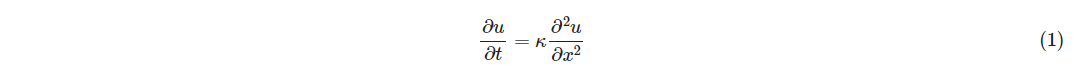


Диффузионная часть этого уравнения может быть численно записана с использованием второго порядка точности:


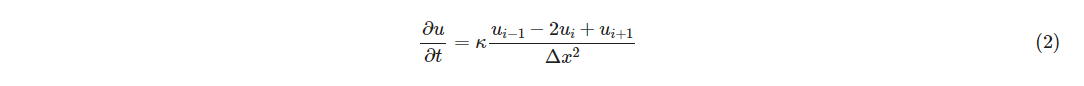

Временная производная записывается численно с использованием первого порядка точности:

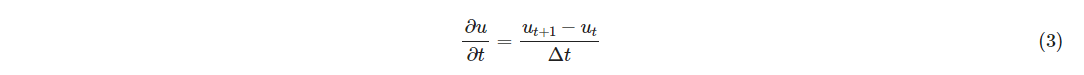

Комбинирование этих двух выражений дает метод Эйлера для решения уравнения теплопроводности:

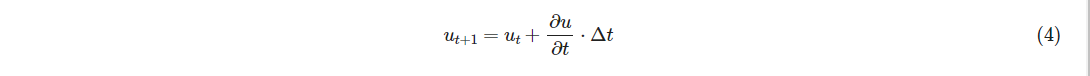



Комбинируя диффузионную часть с временной производной, получаем окончательное уравнение для решения:

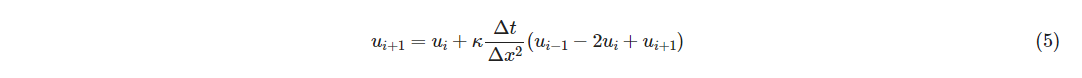

где $\kappa \frac{\Delta t}{\Delta x^2}$ известно как число CFL, которое должно быть меньше 1 для обеспечения численной устойчивости.



## Пример задачи

Представим себе трехмерное пространство, ограниченное двумя стенами. В начальном состоянии температура стен и воздуха между ними равна 0 градусов Цельсия. На момент времени $t_0$ левая стенка подогревается до 100 градусов Цельсия, в то время как правая стенка поддерживается на уровне 0 градусов Цельсия. Как будет изменяться температура воздуха между стенками с течением времени?

CFL: 0.010 < 0.5
10


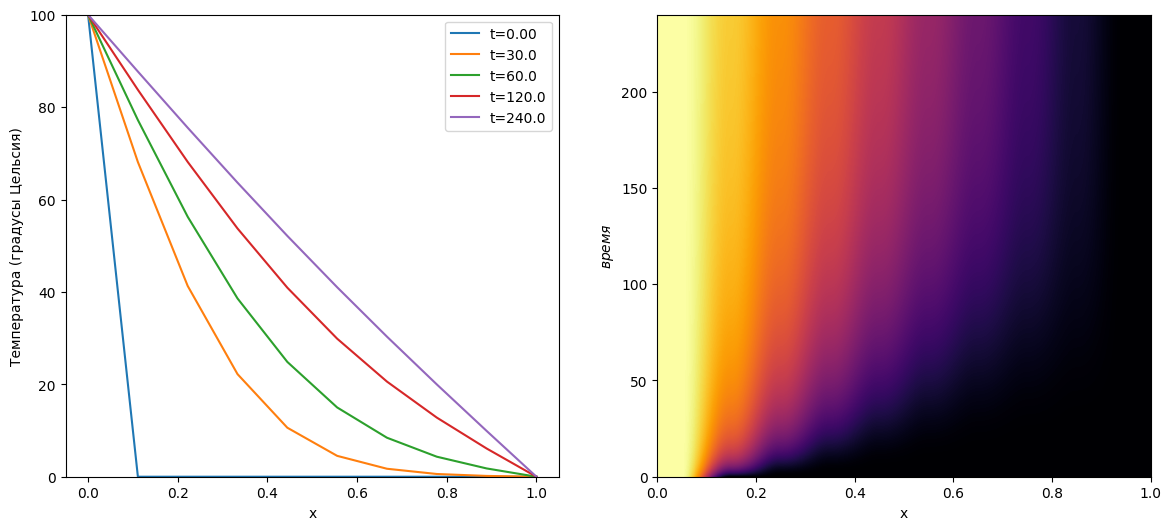

In [7]:
# Определение параметров задачи

# Константа теплопроводности
k = 0.001

# Пространственная область
n = 10                   # количество узлов
L = 1                    # расстояние между стенами
dx = L/n                 # пространственный шаг между узлами
x = np.linspace(0, L, n)

# Временные шаги
T0 = 0  # начальное время
Tn = 240 # конечное время
t_steps = (Tn - T0) * 10 # кол-во временных шагов
dt = (Tn - T0) / t_steps   # временной шаг для метода Эйлера

# Граничные условия
U0 = 100                 # Температура на левой границе при x=0 (условие Дирихле)
U1 = 0                  # Температура на правой границе при x=L (условие Дирихле)

# Начальное условие, u(x,0)=0
Uinit = 0                # Начальная температура воздуха

# Число Куранта используется для проверки численной устойчивости метода 
# и определяется отношением произведения коэффициента теплопроводности, 
# временного шага и квадрата пространственного шага к максимальному значению диффузионного процесса.
CFL = k * dt / dx**2
print(f"CFL: {CFL:0.3f} < 0.5")
assert CFL < 0.5

# Инициализация массива для хранения температурных значений
# массив представляет собой матрицу температур в пространстве и времени. 
# В начальный момент времени все узлы инициализируются начальной температурой Uinit.
u = np.ones(shape=(t_steps, n)) * Uinit


# Создание матрицы дифференцирования, 
# используется для численного вычисления диффузионной части уравнения теплопроводности
# (матрица включает узлы на стенах. Производная равна нулю на стенах)
D = np.zeros(shape=(n, n))
for i in range(1, n-1):
    D[i, i-1] = 1
    D[i, i] = -2
    D[i, i+1] = 1

# Решение уравнения теплопроводности методом конечных разностей
# Вектор частной производной du/dt
# метод Эйлера для численного решения уравнения теплопроводности. 
# Используется явная схема, где производные по времени и пространству аппроксимируются конечными разностями. 
# Решение обновляется на каждом временном шаге в соответствии с численным приближением диффузионной части уравнения.
dudt = np.zeros(shape=(n))
# print("\nu =")
# print(u)
# print("\nD =")
# print(D)
for t in range(0, t_steps-1):
    u[t, 0] = U0
    u[t, n-1] = U1
    dudt = k * np.matmul(D, u[t]) / dx**2
    u[t+1] = u[t] + dudt * dt
    

# Визуализация результатов    
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].set_ylim(min(U0, U1), max(U0, U1))
axs[0].plot(x, u[0], label=f"t={0 * Tn/t_steps:0.2f}")
axs[0].plot(x, u[299], label=f"t={300 * Tn/t_steps:0.1f}")
axs[0].plot(x, u[599], label=f"t={600 * Tn/t_steps:0.1f}")
axs[0].plot(x, u[1199], label=f"t={1200 * Tn/t_steps:0.1f}")
axs[0].plot(x, u[2399], label=f"t={2400 * Tn/t_steps:0.1f}")
axs[0].legend()
axs[0].set_ylabel("Температура (градусы Цельсия)")
axs[0].set_xlabel("x")
axs[1].imshow(u, aspect="auto", cmap="inferno", origin="lower", extent=[0, 1, T0, Tn])
axs[1].set_xlabel("x")
axs[1].set_ylabel("$время$")
plt.show()


1) распределение температуры в пространстве (ось x) в несколько моментов времени.
2) тепловая карта (heatmap), отображает распределение температуры в пространстве и времени.